Trying to use chat to read in and rormat adc files 



In [1]:
import pandas as pd

def extract_adc_headers(hdr_file_path):
    """
    Extracts the ADCFileFormat headers from a .hdr file.
    """
    with open(hdr_file_path, 'r') as file:
        for line in file:
            if line.startswith("ADCFileFormat:"):
                header_line = line.strip().split(":", 1)[1]
                headers = [h.strip() for h in header_line.split(",")]
                return headers
    raise ValueError("ADCFileFormat not found in header file.")

def load_adc_data(adc_file_path, headers):
    """
    Loads the .adc file and applies the given headers to the DataFrame.
    """
    df = pd.read_csv(adc_file_path, header=None)
    df.columns = headers[:df.shape[1]]  # Handle case where fewer headers than columns
    return df

def main(hdr_path, adc_path):
    headers = extract_adc_headers(hdr_path)
    adc_df = load_adc_data(adc_path, headers)
    return adc_df

# Example usage:
if __name__ == "__main__":
    hdr_file = "D20240418T084427_IFCB124.hdr"
    adc_file = "D20240418T084427_IFCB124.adc"
    
    df = main(hdr_file, adc_file)
    print(df.head())  # or df.to_csv("output.csv", index=False) to save


   trigger#   ADCtime      PMTA      PMTB      PMTC      PMTD     PeakA  \
0         1  0.050252  0.000935  0.000955  0.001431  0.001512  0.012803   
1         2  6.354038  0.010157  0.006074  0.002813  0.004811  0.101426   
2         3  6.788669  0.382052  0.462934  0.002982  0.006429  1.219020   
3         3  6.788669  0.382052  0.462934  0.002982  0.006429  1.219020   
4         4  6.953710  0.001927  0.007463  0.002810  0.004696  0.055563   

      PeakB     PeakC     PeakD  ...  RoiY  RoiWidth  RoiHeight  StartByte  \
0  0.012467  0.014577  0.018344  ...     0         0          0          0   
1  0.022662  0.014827  0.018508  ...   630       192        100          0   
2  3.362889  0.015244  0.018942  ...   518       360        212      19200   
3  3.362889  0.015244  0.018942  ...   670        80         60      95520   
4  0.106032  0.014894  0.018578  ...   774        72         44     100320   

   ComparatorOut  StartPoint  SignalLength  Status   RunTime  InhibitTime  
0   

In [80]:
print(df.tail())
print(df.columns)

      trigger#      ADCtime      PMTA      PMTB      PMTC      PMTD     PeakA  \
4114      3724  1199.856117  0.001689  0.009524  0.002846  0.004904  0.040107   
4115      3725  1200.139796  0.002063  0.006877  0.002801  0.004892  0.084679   
4116      3725  1200.139796  0.002063  0.006877  0.002801  0.004892  0.084679   
4117      3726  1200.627856  0.008771  0.322509  0.002859  0.005385  0.118332   
4118      3727  1200.737582  0.002055  0.007907  0.002781  0.004823  0.068109   

         PeakB     PeakC     PeakD  ...  RoiHeight  StartByte  ComparatorOut  \
4114  0.201244  0.014932  0.018563  ...         44   62398544              0   
4115  0.087030  0.014946  0.018613  ...         44   62401360              0   
4116  0.087030  0.014946  0.018613  ...         44   62403824              0   
4117  3.204517  0.015130  0.018804  ...        108   62406640              0   
4118  0.087471  0.014925  0.018616  ...         52   62422192              0   

      StartPoint  SignalLength  

In [21]:
print(df[['ADCtime', 'GrabTimeStart', 'GrabTimeEnd', 'RunTime', 'InhibitTime','InhibitTimeDiff']].head())

    ADCtime  GrabTimeStart  GrabTimeEnd   RunTime  InhibitTime  \
0  0.050252       0.050252     0.092326  0.071187     0.000000   
1  6.354038       6.354038     6.396017  6.375004     0.070996   
2  6.788669       6.788669     6.830955  6.809937     0.152806   
3  6.788669       6.788669     6.830955  6.809937     0.152806   
4  6.953710       6.953710     6.995728  6.974722     0.234607   

   InhibitTimeDiff  
0         0.000000  
1         0.070996  
2         0.081810  
3         0.000000  
4         0.081801  


### ADC Names and what they mean
trigger#, which trigger number the roi is associated this is not unique can have double or tripple rois

ADCtime, counts up from 0 to 1200 s or 20m this is likely at what time since the beginning of the sample did this trigger happen

PMTA, PMTB, PMTC, PMTD, electrical values of pmts

PeakA, PeakB, PeakC, PeakD, 

TimeOfFlight, 

GrabTimeStart, 

GrabTimeEnd,

RoiX, RoiY, RoiWidth, RoiHeight,

StartByte,

ComparatorOut,

StartPoint,

SignalLength,

Status,

RunTime, running tally of total time

InhibitTime running tally of time when we are not imaging


## how to calculate volume analyzed

Instantaneous estimates of sample volume analyzed will be:

[run_time - inhibit_time]/[240]

Alternatively, it may be possible to update run_time as grab_time_end since that's the point in time when last trigger image capture ended. So:

[grab_time_end - inhibit_time]/[240]

The '240' is the number of seconds required to analyze 1 mL of sample so result is in mL. If inhibit_time isn't reported directly by IFCBacq trigger report, it might be estimated instead as a running sum of [grab_time_end - grab_time_start].



so if we want to create 

In [24]:
# creating a value for each individual inhibit time of each sample and replaces leading NaN with 0.000
df['InhibitTimeDiff'] = df['InhibitTime'].diff().fillna(0)
print(df.head())

   trigger#   ADCtime      PMTA      PMTB      PMTC      PMTD     PeakA  \
0         1  0.050252  0.000935  0.000955  0.001431  0.001512  0.012803   
1         2  6.354038  0.010157  0.006074  0.002813  0.004811  0.101426   
2         3  6.788669  0.382052  0.462934  0.002982  0.006429  1.219020   
3         3  6.788669  0.382052  0.462934  0.002982  0.006429  1.219020   
4         4  6.953710  0.001927  0.007463  0.002810  0.004696  0.055563   

      PeakB     PeakC     PeakD  ...  RoiWidth  RoiHeight  StartByte  \
0  0.012467  0.014577  0.018344  ...         0          0          0   
1  0.022662  0.014827  0.018508  ...       192        100          0   
2  3.362889  0.015244  0.018942  ...       360        212      19200   
3  3.362889  0.015244  0.018942  ...        80         60      95520   
4  0.106032  0.014894  0.018578  ...        72         44     100320   

   ComparatorOut  StartPoint  SignalLength  Status   RunTime  InhibitTime  \
0              0           0           

In [26]:
#save this df
df.to_csv('output.csv', index=False)

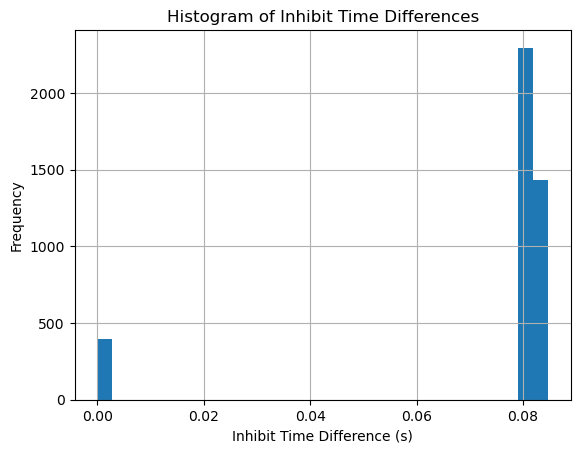

In [11]:
# plotting histogram of this diff time
import matplotlib.pyplot as plt

# Create histogram
df['InhibitTimeDiff'].hist(bins=30)  # You can adjust the number of bins

# Add labels and title
plt.xlabel('Inhibit Time Difference (s)')
plt.ylabel('Frequency')
plt.title('Histogram of Inhibit Time Differences')

# Show the plot
plt.show()

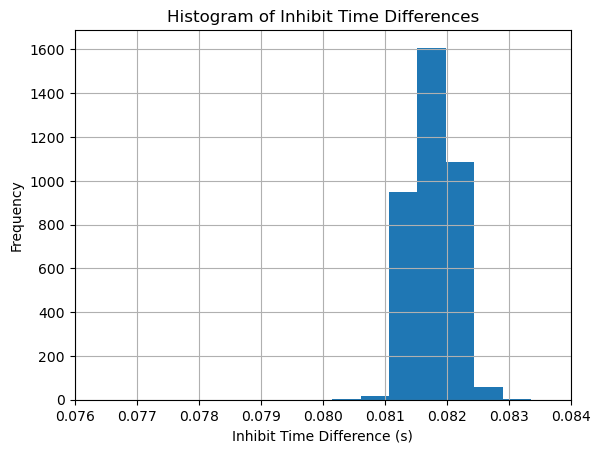

In [16]:
#removing the 0 values for double rois to see more of the actual data visualized
filtered_df = df[df['InhibitTimeDiff'] != 0]


# plotting histogram of this diff time
import matplotlib.pyplot as plt

# Create histogram
filtered_df['InhibitTimeDiff'].hist(bins=30)  # You can adjust the number of bins

# Add labels and title
plt.xlabel('Inhibit Time Difference (s)')
plt.ylabel('Frequency')
plt.title('Histogram of Inhibit Time Differences')
plt.xlim(0.076,0.084)

# Show the plot
plt.show()

So average is very tightly about 0.081 seconds with a lot of 0 values for double rois 


In [66]:
## load in a class file to see if there is a var we can use to bind two df together

classdf = pd.read_csv('D20240418T084427_IFCB124_class_vNone.csv')
print(classdf['pid'].head(n=50))

0     D20240418T084427_IFCB124_00002
1     D20240418T084427_IFCB124_00003
2     D20240418T084427_IFCB124_00004
3     D20240418T084427_IFCB124_00005
4     D20240418T084427_IFCB124_00006
5     D20240418T084427_IFCB124_00007
6     D20240418T084427_IFCB124_00008
7     D20240418T084427_IFCB124_00009
8     D20240418T084427_IFCB124_00010
9     D20240418T084427_IFCB124_00011
10    D20240418T084427_IFCB124_00012
11    D20240418T084427_IFCB124_00013
12    D20240418T084427_IFCB124_00014
13    D20240418T084427_IFCB124_00015
14    D20240418T084427_IFCB124_00016
15    D20240418T084427_IFCB124_00017
16    D20240418T084427_IFCB124_00018
17    D20240418T084427_IFCB124_00019
18    D20240418T084427_IFCB124_00020
19    D20240418T084427_IFCB124_00021
20    D20240418T084427_IFCB124_00022
21    D20240418T084427_IFCB124_00023
22    D20240418T084427_IFCB124_00024
23    D20240418T084427_IFCB124_00025
24    D20240418T084427_IFCB124_00026
25    D20240418T084427_IFCB124_00027
26    D20240418T084427_IFCB124_00028
2

In [58]:
print(classdf.columns)

Index(['pid', 'Alexandrium_catenella',
       'Alexandrium_catenella_TAG_2cell_TAG_chain',
       'Alexandrium_catenella_TAG_4cell_TAG_chain',
       'Alexandrium_catenella_TAG_dividing',
       'Alexandrium_catenella_TAG_fusing', 'Amoeba', 'Amylax', 'Apedinella',
       'Asterionellopsis_glacialis',
       ...
       'fecal_pellet', 'fiber', 'fiber_TAG_external_detritus', 'flagellate',
       'flagellate_morphotype1', 'flagellate_morphotype3', 'pennate',
       'pollen_spikey_dino', 'unknown2', 'RoiNumber'],
      dtype='object', length=138)


In [54]:
#shows diff in rows between adc triggers and rois however 
print(classdf.shape[0])
print(df.shape[0])
print(cleaned_df.shape[0])


4113
4119
4113


In [81]:
import pandas as pd

def remove_zero_roi_rows(df):
    """
    Remove rows from a DataFrame where RoiX, RoiY, RoiHeight, and RoiWidth are all 0.
    Returns a new cleaned DataFrame.
    """
    cleandf = df[~((df['RoiX'] == 0) & (df['RoiY'] == 0) &
                   (df['RoiHeight'] == 0) & (df['RoiWidth'] == 0))]

    print(f"Removed {len(df) - len(cleandf)} rows.")
    return cleandf

# Example usage:
# df = pd.read_csv("your_input_file.csv")
# cleandf = remove_zero_roi_rows(df)

In [82]:
cleaned_df = remove_zero_roi_rows(df)
print(cleaned_df.shape[0]) # this should match class value

Removed 6 rows.
4113


# can we just merge based on index number now? How does PID relate to roi ?? trigger is not the same at all but how can we relate adc files denoted by trigger to class files -- is there an intermediate step

In [83]:
print(cleaned_df.tail())

      trigger#      ADCtime      PMTA      PMTB      PMTC      PMTD     PeakA  \
4114      3724  1199.856117  0.001689  0.009524  0.002846  0.004904  0.040107   
4115      3725  1200.139796  0.002063  0.006877  0.002801  0.004892  0.084679   
4116      3725  1200.139796  0.002063  0.006877  0.002801  0.004892  0.084679   
4117      3726  1200.627856  0.008771  0.322509  0.002859  0.005385  0.118332   
4118      3727  1200.737582  0.002055  0.007907  0.002781  0.004823  0.068109   

         PeakB     PeakC     PeakD  ...  RoiHeight  StartByte  ComparatorOut  \
4114  0.201244  0.014932  0.018563  ...         44   62398544              0   
4115  0.087030  0.014946  0.018613  ...         44   62401360              0   
4116  0.087030  0.014946  0.018613  ...         44   62403824              0   
4117  3.204517  0.015130  0.018804  ...        108   62406640              0   
4118  0.087471  0.014925  0.018616  ...         52   62422192              0   

      StartPoint  SignalLength  

In [49]:

# Add RoiNumber column starting from 1 in adc file
cleaned_df['RoiNumber'] = range(1, len(cleaned_df) + 1)

In [55]:
#extract roi from PID from class files
def extract_roi_number_from_pid(classdf, pid_column='pid', new_column='RoiNumber'):
    """
    Extracts the trailing numeric ROI identifier from a PID string and stores it as an integer in a new column.
    
    Args:
        df (pd.DataFrame): The DataFrame containing the PID column.
        pid_column (str): The name of the column containing PID strings.
        new_column (str): The name of the new column to store the extracted ROI number.
    
    Returns:
        pd.DataFrame: The updated DataFrame with the new RoiNumber column.
    """
    # Split by underscore and take the last part, then convert to integer
    classdf[new_column] = df[pid_column].str.split('_').str[-1].astype(int)
    return classdf

# Example usage:
if __name__ == "__main__":
    # Example loading a CSV (or replace with your actual DataFrame)
    #classdf = pd.read_csv("your_dataframe.csv")

    # Extract RoiNumber from pid
    classdf = extract_roi_number_from_pid(classdf)

    # Save or display the result
    print(classdf[['pid', 'RoiNumber']].head())
    # df.to_csv("output_with_roi.csv", index=False)

KeyError: 'pid'

In [73]:
#splitting the pid column into just its trailing roi number and saving that as a new column as a int
classdf['RoiNumber'] = classdf['pid'].str.split('_').str[-1].astype(int)


In [72]:
print(classdf['RoiNumber'].tail(n=50))


4063    4070
4064    4071
4065    4072
4066    4073
4067    4074
4068    4075
4069    4076
4070    4077
4071    4078
4072    4079
4073    4080
4074    4081
4075    4082
4076    4083
4077    4084
4078    4085
4079    4086
4080    4087
4081    4088
4082    4089
4083    4090
4084    4091
4085    4092
4086    4093
4087    4094
4088    4095
4089    4096
4090    4097
4091    4098
4092    4099
4093    4100
4094    4101
4095    4102
4096    4103
4097    4104
4098    4105
4099    4106
4100    4107
4101    4108
4102    4109
4103    4110
4104    4111
4105    4112
4106    4113
4107    4114
4108    4115
4109    4116
4110    4117
4111    4118
4112    4119
Name: RoiNumber, dtype: int64


In [70]:
print(classdf.columns.tolist())

['pid', 'Alexandrium_catenella', 'Alexandrium_catenella_TAG_2cell_TAG_chain', 'Alexandrium_catenella_TAG_4cell_TAG_chain', 'Alexandrium_catenella_TAG_dividing', 'Alexandrium_catenella_TAG_fusing', 'Amoeba', 'Amylax', 'Apedinella', 'Asterionellopsis_glacialis', 'Bacillariophyceae_morphotype1', 'Balanion', 'Calciopappus', 'Cerataulina_pelagica', 'Chaetoceros', 'Chaetoceros_TAG_external_pennate', 'Chaetoceros_didymus', 'Chaetoceros_didymus_TAG_external_flagellate', 'Chaetoceros_morphotype1', 'Chaetoceros_similis', 'Chaetoceros_socialis', 'Chaetoceros_subtilis', 'Chaetoceros_tenuissimus', 'Chrysochromulina', 'Chrysochromulina_lanceolata', 'Ciliophora', 'Copepod_nauplii', 'Corethron_hystrix', 'Corymbellus', 'Coscinodiscus', 'Cryptophyta', 'Cylindrotheca', 'Dactyliosolen_blavyanus', 'Dactyliosolen_fragilissimus', 'Delphineis', 'Dictyocha', 'Dinobryon', 'Dinophysis_acuminata', 'Dinophysis_acuminata_TAG_dividing', 'Dinophysis_acuminata_TAG_mating', 'Dinophysis_norvegica', 'Ditylum_brightwellii

In [75]:
#checking for repeats in the class rois
# Find duplicated RoiNumber values
duplicates = classdf['RoiNumber'][classdf['RoiNumber'].duplicated()]

# Get unique RoiNumber values that are duplicated
duplicated_values = duplicates.unique()

print("Duplicated RoiNumber values:", duplicated_values)




Duplicated RoiNumber values: []


# Now I think I have classdf with roi numbers and cleaneddf with adc roi numbers lets check and see if they are the same and then we can try to merge them based on that value -- or we could just create a volume analyzed column and put just that onto the class file to save processing

In [78]:
print(cleaned_df['RoiNumber'].tail(n=10))
print(classdf['RoiNumber'].tail(n=10))

4103    4104
4104    4105
4105    4106
4106    4107
4107    4108
4108    4109
4109    4110
4110    4111
4111    4112
4112    4113
Name: RoiNumber, dtype: int64
4103    4110
4104    4111
4105    4112
4106    4113
4107    4114
4108    4115
4109    4116
4110    4117
4111    4118
4112    4119
Name: RoiNumber, dtype: int64


# I wonder if what happened here is that actually zero rois do get a roi number so I need to first create the roi number or could I just use the trigger number

In [89]:
print(cleaned_df['RoiNumber'].head(n=10))
print(classdf['RoiNumber'].head(n=10))

1      2
2      3
3      4
4      5
5      6
6      7
7      8
8      9
9     10
10    11
Name: RoiNumber, dtype: int64
0     2
1     3
2     4
3     5
4     6
5     7
6     8
7     9
8    10
9    11
Name: RoiNumber, dtype: int64


# Nope so need to first asign roi numbers to each row then clear the zero rois then see if they match up

In [84]:
cleaned_df = remove_zero_roi_rows(df) #use this nifty function I made earlier
print(cleaned_df.shape[0]) # this should match class value
print(cleaned_df.tail())

Removed 6 rows.
4113
      trigger#      ADCtime      PMTA      PMTB      PMTC      PMTD     PeakA  \
4114      3724  1199.856117  0.001689  0.009524  0.002846  0.004904  0.040107   
4115      3725  1200.139796  0.002063  0.006877  0.002801  0.004892  0.084679   
4116      3725  1200.139796  0.002063  0.006877  0.002801  0.004892  0.084679   
4117      3726  1200.627856  0.008771  0.322509  0.002859  0.005385  0.118332   
4118      3727  1200.737582  0.002055  0.007907  0.002781  0.004823  0.068109   

         PeakB     PeakC     PeakD  ...  RoiHeight  StartByte  ComparatorOut  \
4114  0.201244  0.014932  0.018563  ...         44   62398544              0   
4115  0.087030  0.014946  0.018613  ...         44   62401360              0   
4116  0.087030  0.014946  0.018613  ...         44   62403824              0   
4117  3.204517  0.015130  0.018804  ...        108   62406640              0   
4118  0.087471  0.014925  0.018616  ...         52   62422192              0   

      Start

In [ ]:
# now check if roi cleaned is equal to roi class

In [85]:
if not cleaned_df['RoiNumber'].equals(classdf['RoiNumber']):
    print("❌ RoiNumber columns are NOT the same.")
else:
    print("✅ RoiNumber columns match exactly.")


❌ RoiNumber columns are NOT the same.


In [86]:
# Find indices where the values differ --  this will only work if indexing is the same so might not really work here
differences = cleaned_df['RoiNumber'] != classdf['RoiNumber']

# Show only rows that differ
if differences.any():
    print("Rows with different RoiNumbers:")
    print(cleaned_df.loc[differences, 'RoiNumber'].reset_index(drop=True).rename("cleaned_df"))
    print(classdf.loc[differences, 'RoiNumber'].reset_index(drop=True).rename("classdf"))
else:
    print("All RoiNumbers match.")


ValueError: Can only compare identically-labeled Series objects

In [90]:
# Reset index to align rows for element-wise comparison
roi_clean = cleaned_df['RoiNumber'].reset_index(drop=True)
roi_class = classdf['RoiNumber'].reset_index(drop=True)

# Now compare them
differences = roi_clean != roi_class

if differences.any():
    print("Rows with different RoiNumbers:")
    print("cleaned_df values:")
    print(roi_clean[differences])
    print("\nclassdf values:")
    print(roi_class[differences])
else:
    print("All RoiNumbers match by position.")


All RoiNumbers match by position.


# wahoo they match so now lets calculatea running list of sample volumes in the adc file
### this is done by :

## how to calculate volume analyzed

Instantaneous estimates of sample volume analyzed will be:

[run_time - inhibit_time]/[240]

Alternatively, it may be possible to update run_time as grab_time_end since that's the point in time when last trigger image capture ended. So:

[grab_time_end - inhibit_time]/[240]

The '240' is the number of seconds required to analyze 1 mL of sample so result is in mL. If inhibit_time isn't reported directly by IFCBacq trigger report, it might be estimated instead as a running sum of [grab_time_end - grab_time_start].



so if we want to create running volume analyzed it should just be run time - inhibit time / 240 for each row since both those valies are cumulative


In [92]:
#check final volume against volume on ifcb dashboard using the above formula
print(cleaned_df.tail())

      trigger#      ADCtime      PMTA      PMTB      PMTC      PMTD     PeakA  \
4114      3724  1199.856117  0.001689  0.009524  0.002846  0.004904  0.040107   
4115      3725  1200.139796  0.002063  0.006877  0.002801  0.004892  0.084679   
4116      3725  1200.139796  0.002063  0.006877  0.002801  0.004892  0.084679   
4117      3726  1200.627856  0.008771  0.322509  0.002859  0.005385  0.118332   
4118      3727  1200.737582  0.002055  0.007907  0.002781  0.004823  0.068109   

         PeakB     PeakC     PeakD  ...  RoiHeight  StartByte  ComparatorOut  \
4114  0.201244  0.014932  0.018563  ...         44   62398544              0   
4115  0.087030  0.014946  0.018613  ...         44   62401360              0   
4116  0.087030  0.014946  0.018613  ...         44   62403824              0   
4117  3.204517  0.015130  0.018804  ...        108   62406640              0   
4118  0.087471  0.014925  0.018616  ...         52   62422192              0   

      StartPoint  SignalLength  

In [94]:
(1200.819306 - 304.709028 )/ 240
# its a match!


3.7337928250000005

In [91]:
print(cleaned_df.columns)

Index(['trigger#', 'ADCtime', 'PMTA', 'PMTB', 'PMTC', 'PMTD', 'PeakA', 'PeakB',
       'PeakC', 'PeakD', 'TimeOfFlight', 'GrabTimeStart', 'GrabTimeEnd',
       'RoiX', 'RoiY', 'RoiWidth', 'RoiHeight', 'StartByte', 'ComparatorOut',
       'StartPoint', 'SignalLength', 'Status', 'RunTime', 'InhibitTime',
       'InhibitTimeDiff', 'RoiNumber'],
      dtype='object')


In [96]:
# create VolumeAnalyzed

#first ensure that the df is a clean copy not jsut a fileted set
cleaned_df = cleaned_df.copy()

# then can calculate the volume

cleaned_df['VolumeAnalyzed'] = (cleaned_df['RunTime']-cleaned_df['InhibitTime'])/240

In [97]:
print(cleaned_df.tail())

      trigger#      ADCtime      PMTA      PMTB      PMTC      PMTD     PeakA  \
4114      3724  1199.856117  0.001689  0.009524  0.002846  0.004904  0.040107   
4115      3725  1200.139796  0.002063  0.006877  0.002801  0.004892  0.084679   
4116      3725  1200.139796  0.002063  0.006877  0.002801  0.004892  0.084679   
4117      3726  1200.627856  0.008771  0.322509  0.002859  0.005385  0.118332   
4118      3727  1200.737582  0.002055  0.007907  0.002781  0.004823  0.068109   

         PeakB     PeakC     PeakD  ...  StartByte  ComparatorOut  StartPoint  \
4114  0.201244  0.014932  0.018563  ...   62398544              0           0   
4115  0.087030  0.014946  0.018613  ...   62401360              0           0   
4116  0.087030  0.014946  0.018613  ...   62403824              0           0   
4117  3.204517  0.015130  0.018804  ...   62406640              0           0   
4118  0.087471  0.014925  0.018616  ...   62422192              0           0   

      SignalLength  Status

## Now let's merge the volume anayzed based on roi number into the class file

In [106]:
# Merge just the RoiNumber and VolumeAnalyzed columns into classdf
classdf = classdf.merge(
    cleaned_df[['RoiNumber', 'VolumeAnalyzed','RunTime']],
    on='RoiNumber',
    how='left'  # or 'inner' if you want only matching rows
)


In [109]:
print(classdf.columns) # inspect why are there two did I just press twice?

Index(['pid', 'Alexandrium_catenella',
       'Alexandrium_catenella_TAG_2cell_TAG_chain',
       'Alexandrium_catenella_TAG_4cell_TAG_chain',
       'Alexandrium_catenella_TAG_dividing',
       'Alexandrium_catenella_TAG_fusing', 'Amoeba', 'Amylax', 'Apedinella',
       'Asterionellopsis_glacialis',
       ...
       'fiber_TAG_external_detritus', 'flagellate', 'flagellate_morphotype1',
       'flagellate_morphotype3', 'pennate', 'pollen_spikey_dino', 'unknown2',
       'RoiNumber', 'VolumeAnalyzed', 'RunTime'],
      dtype='object', length=140)


In [103]:
print(classdf['VolumeAnalyzed_x'].tail())
print(classdf['VolumeAnalyzed_y'].tail())
# they look the same -- pandas will auto do this if you riun it twice to keep you from overwriting your data

4108    3.731141
4109    3.731983
4110    3.731983
4111    3.733679
4112    3.733793
Name: VolumeAnalyzed_x, dtype: float64
4108    3.731141
4109    3.731983
4110    3.731983
4111    3.733679
4112    3.733793
Name: VolumeAnalyzed_y, dtype: float64


In [108]:
# If you want to keep the newly merged one (_y) and remove the old one (_x)
classdf = classdf.drop(columns=['VolumeAnalyzed_x']) \
                 .rename(columns={'VolumeAnalyzed_y': 'VolumeAnalyzed'})

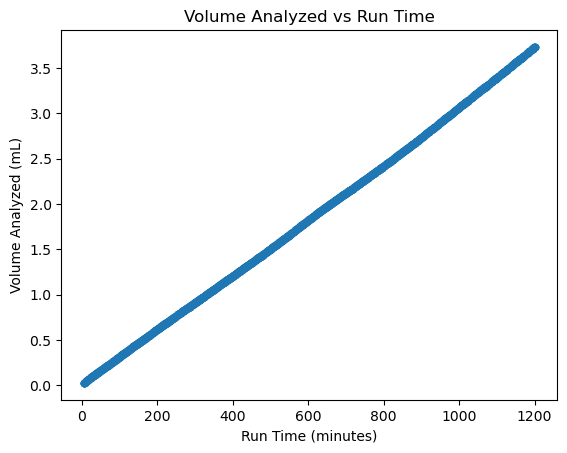

In [110]:
import matplotlib.pyplot as plt

ax = classdf.plot(x='RunTime', y='VolumeAnalyzed', kind='scatter')
ax.set_xlabel('Run Time (minutes)')
ax.set_ylabel('Volume Analyzed (mL)')
ax.set_title('Volume Analyzed vs Run Time')

plt.show()

## so thats cool I guess we know that in volume analyzed is pretty linear as expexted and looks like how it should
### now to figure out how to make a cells per liter of something and add to the plot
 I think the easiest way to do this is just pick on that I think will have a good number of hits within the dataset then create a running list of how many there are 
 An efficient but easy way to do it would be create a binary based on over or under of a score then create a new row that just sums this binary
 I bet there is a better way to do this lets consult the git and chat

 #### need to knowq what the threshhold is for the class data


In [111]:
print(classdf.head())

                              pid  Alexandrium_catenella  \
0  D20240418T084427_IFCB124_00002           0.000000e+00   
1  D20240418T084427_IFCB124_00003           0.000000e+00   
2  D20240418T084427_IFCB124_00004           0.000000e+00   
3  D20240418T084427_IFCB124_00005           1.000000e-07   
4  D20240418T084427_IFCB124_00006           0.000000e+00   

   Alexandrium_catenella_TAG_2cell_TAG_chain  \
0                                   0.000000   
1                                   0.000000   
2                                   0.000000   
3                                   0.000003   
4                                   0.000000   

   Alexandrium_catenella_TAG_4cell_TAG_chain  \
0                               0.000000e+00   
1                               6.000000e-08   
2                               0.000000e+00   
3                               0.000000e+00   
4                               0.000000e+00   

   Alexandrium_catenella_TAG_dividing  Alexandrium_catenella_

# I think I should clean this up and streamlinen it -- also worthwhile because I want to do this with a bin that has lots of alexandrium or something that we have reasonable confidence in the classifier results so lets begin here

## steps
1. load in and clean ADC HDR and Class
2. Create roi number in both ADC and Class file
3. Create instant inhibit time in ADC
4. Calculate instant volume analyzed in ADC
5. Merge volume analyzed to class on roi numner
6. create metric for is alexandrium -- i think binary makes sense and then sum
7. create running sum of Alexandrium and cells/ml
8. graph
9. make mike proud of me

I am going to do this on a new sheet